## அடிப்படை Pandas உதாரணங்கள்

இந்த நோட்புக் சில அடிப்படை Pandas கருத்துகளை உங்களுக்குக் காட்டும். நாம் பொதுவான தரவியல் அறிவியல் நூலகங்களை இறக்குமதி செய்வதிலிருந்து தொடங்குவோம்:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### தொடர்

தொடர் என்பது பட்டியல் அல்லது 1D-அரே போன்றது, ஆனால் அதில் குறியீடு உள்ளது. அனைத்து செயல்பாடுகளும் குறியீடு ஒழுங்குபடுத்தப்பட்டவையாக இருக்கும்.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


சீரிஸ் பயன்படுத்தப்படும் முக்கியமான வகைகளில் ஒன்று **நேரம் சார்ந்த சீரிஸ்** ஆகும். நேரம் சார்ந்த சீரிஸில், குறியீட்டிற்கு ஒரு சிறப்பு அமைப்பு இருக்கும் - பொதுவாக தேதிகள் அல்லது தேதிகாலங்கள் வரம்பாக இருக்கும். இதைப் `pd.date_range` மூலம் உருவாக்கலாம்.

நாம் தினமும் வாங்கப்படும் பொருட்களின் அளவை காட்டும் ஒரு சீரிஸ் வைத்திருக்கிறோம் என்று நினைத்துக்கொள்ளுங்கள், மேலும் ஒவ்வொரு ஞாயிற்றுக்கிழமையும் நாங்கள் ஒரு பொருளை எங்களுக்காக எடுத்துக்கொள்ள வேண்டும் என்று தெரிந்தால். இதை சீரிஸ் மூலம் எப்படி மாதிரியாக்கலாம்:


Length of index is 366


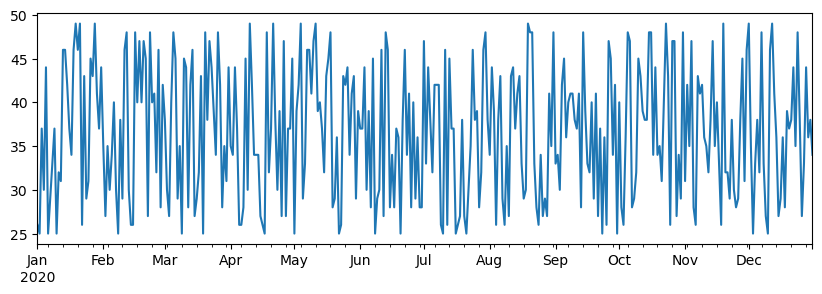

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


நீங்கள் காணக்கூடியபடி, இங்கே நாங்கள் சிக்கல்களை எதிர்கொள்கிறோம், ஏனெனில் வாராந்திர தொடர்களில் குறிப்பிடப்படாத நாட்கள் காணாமல் போனவை (`NaN`) எனக் கருதப்படுகின்றன, மேலும் ஒரு எண்ணிற்கு `NaN` ஐச் சேர்த்தால், அது `NaN` ஆக மாறுகிறது. சரியான முடிவை பெற, தொடர்களைச் சேர்க்கும்போது `fill_value` ஐ குறிப்பிட வேண்டும்:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


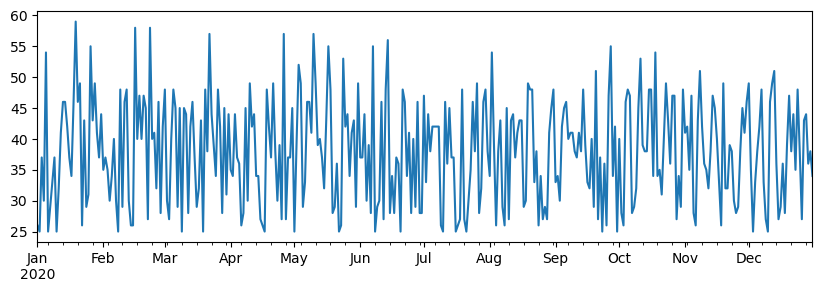

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

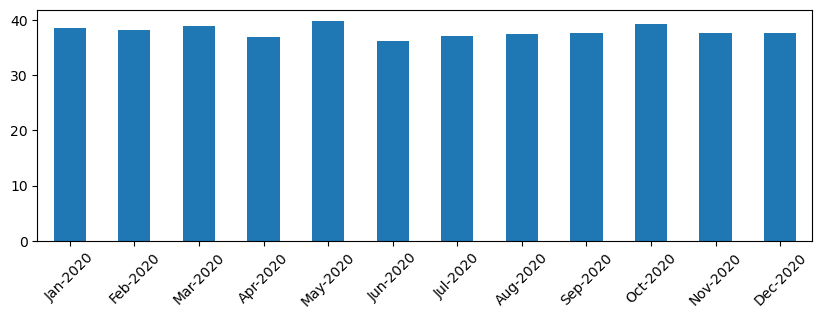

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame என்பது ஒரே இன்டெக்ஸ் கொண்ட பல சீரிஸ் தொகுப்பாகும். நாம் பல சீரிஸ்களை ஒன்றாக இணைத்து ஒரு DataFrame உருவாக்கலாம். மேலே வரையறுக்கப்பட்ட `a` மற்றும் `b` சீரிஸ்களை கொண்டு:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

நாம் தொடர்களை நெடுவரிசைகளாகவும் பயன்படுத்தலாம், மற்றும் நெடுவரிசை பெயர்களை அகராதி மூலம் குறிப்பிடலாம்:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

அதே முடிவை மாற்றி அமைத்தல் (பின்னர் களங்களை மறுபெயரிடுதல், முந்தைய உதாரணத்துடன் பொருந்த) மூலம் பெற முடியும்:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**DataFrame-இல்** நெடுவரிசைகளைத் தேர்ந்தெடுப்பது இவ்வாறு செய்யலாம்:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**வடிகட்டல் வெளிப்பாட்டின்** அடிப்படையில் வரிசைகளைத் தேர்வு செய்வது:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

இது செயல்படும் விதம் என்னவென்றால், `df['A']<5` என்ற வெளிப்பாடு ஒரு boolean தொடர் (series) ஐ திருப்புகிறது, இது ஒவ்வொரு தொடர் உருப்படிகளுக்கும் வெளிப்பாடு `True` அல்லது `False` ஆக உள்ளதா என்பதை குறிக்கிறது. தொடர் ஒரு குறியீடாக (index) பயன்படுத்தப்படும் போது, அது DataFrame இல் வரிசைகளின் துணைத் தொகுப்பை திருப்புகிறது. எனவே, 任Python boolean வெளிப்பாட்டை 任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任任


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**புதிய கணக்கிடக்கூடிய நெடுவரிசைகளை உருவாக்குதல்**. எளிதாக புரிந்துகொள்ளக்கூடிய வெளிப்பாடுகளைப் பயன்படுத்தி, நமது DataFrame-க்கு புதிய கணக்கிடக்கூடிய நெடுவரிசைகளை எளிதாக உருவாக்கலாம். கீழே உள்ள குறியீடு A-வின் சராசரி மதிப்பிலிருந்து அதன் மாறுபாட்டை கணக்கிடுகிறது.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

என்ன நடக்கிறது என்றால், நாம் ஒரு தொடர் கணக்கிடுகிறோம், பின்னர் இந்த தொடரை இடப்பக்கத்தில் ஒதுக்கி, மற்றொரு நெடுவரிசையை உருவாக்குகிறோம்.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**எண்களை அடிப்படையாகக் கொண்டு வரிசைகளைத் தேர்வு செய்வது** `iloc` கட்டமைப்பைப் பயன்படுத்தி செய்யலாம். உதாரணமாக, DataFrame-இல் முதல் 5 வரிசைகளைத் தேர்வு செய்ய:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**குழுவாக்கம்** என்பது Excel இல் உள்ள *pivot tables* போன்ற ஒரு முடிவை பெற பொதுவாக பயன்படுத்தப்படுகிறது. `LenB` என்ற ஒவ்வொரு எண்ணிற்கும் `A` நெடுவரிசையின் சராசரி மதிப்பை கணக்கிட விரும்புகிறோம் எனக் கொள்வோம். அப்போது நாங்கள் எங்கள் DataFrame-ஐ `LenB` மூலம் குழுவாக்கி, `mean` ஐ அழைக்கலாம்:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

குழுவில் சராசரி மற்றும் உருப்படிகளின் எண்ணிக்கையை கணக்கிட வேண்டுமெனில், நாம் மேலும் சிக்கலான `aggregate` செயல்பாட்டைப் பயன்படுத்தலாம்:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## அச்சிடுதல் மற்றும் வரைபடம்

தரவியல் விஞ்ஞானிகள் அடிக்கடி தரவுகளை ஆராய வேண்டும், எனவே அதை காட்சிப்படுத்துவதில் திறமை பெறுவது முக்கியம். DataFrame பெரியதாக இருக்கும் போது, பல நேரங்களில் நாம் சரியாக செய்கிறோம் என்பதை உறுதிப்படுத்த முதல் சில வரிகளை அச்சிட்டு பார்க்க விரும்புகிறோம். இதை `df.head()` ஐ அழைப்பதன் மூலம் செய்யலாம். நீங்கள் இதை Jupyter Notebook-ல் இயக்கினால், DataFrame-ஐ அழகான அட்டவணை வடிவத்தில் அச்சிடும்.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

நாம் `plot` செயல்பாட்டின் பயன்பாட்டையும் சில நெடுக்களை காட்சிப்படுத்துவதற்கும் பார்த்துள்ளோம். `plot` பல பணிகளுக்கு மிகவும் பயனுள்ளதாகவும், `kind=` பராமரிப்பின் மூலம் பல்வேறு வகையான வரைபடங்களை ஆதரிக்கக்கூடியதாகவும் உள்ளது. ஆனால், நீங்கள் எப்போதும் `matplotlib` நூலகத்தை நேரடியாக பயன்படுத்தி மேலும் சிக்கலான ஒன்றை வரைபடமாக்கலாம். தரவுக் காட்சிப்படுத்தலை விரிவாக தனித்த பாடங்களில் கற்போம்.


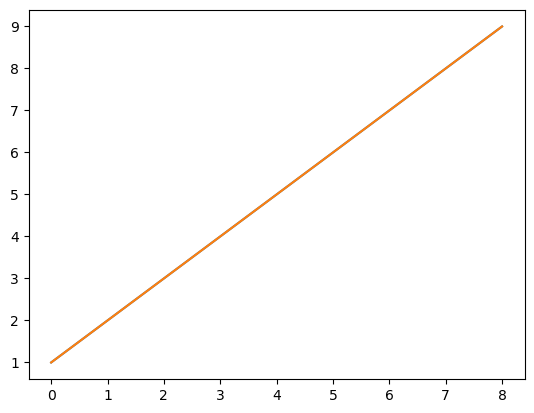

In [61]:
df['A'].plot()
plt.show()

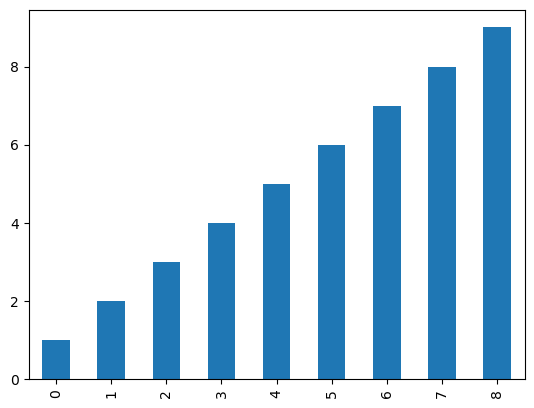

In [63]:
df['A'].plot(kind='bar')
plt.show()

இந்த மேலோட்டம் Pandas இன் முக்கியமான கருத்துகளை உள்ளடக்கியது, ஆனால் இந்த நூலகம் மிகவும் வளமானது, இதைப் பயன்படுத்தி நீங்கள் செய்யக்கூடியவற்றுக்கு எல்லையில்லை! இப்போது, இந்த அறிவை குறிப்பிட்ட பிரச்சினையை தீர்க்க பயன்படுத்துவோம்.



---

**அறிவிப்பு**:  
இந்த ஆவணம் [Co-op Translator](https://github.com/Azure/co-op-translator) என்ற AI மொழிபெயர்ப்பு சேவையை பயன்படுத்தி மொழிபெயர்க்கப்பட்டுள்ளது. நாங்கள் துல்லியத்திற்காக முயற்சிக்கிறோம், ஆனால் தானியங்கி மொழிபெயர்ப்புகளில் பிழைகள் அல்லது தவறுகள் இருக்கக்கூடும் என்பதை தயவுசெய்து கவனத்தில் கொள்ளவும். அதன் சொந்த மொழியில் உள்ள மூல ஆவணம் அதிகாரப்பூர்வ ஆதாரமாக கருதப்பட வேண்டும். முக்கியமான தகவல்களுக்கு, தொழில்முறை மனித மொழிபெயர்ப்பு பரிந்துரைக்கப்படுகிறது. இந்த மொழிபெயர்ப்பைப் பயன்படுத்துவதால் ஏற்படும் எந்த தவறான புரிதல்களுக்கும் அல்லது தவறான விளக்கங்களுக்கும் நாங்கள் பொறுப்பல்ல.
